In [115]:
# Importacao das bilbiotecas necessárias
import requests
import pandas as pd
import sys
from bs4 import BeautifulSoup


Parametros de entrada da API
- ano
- segmento da pesquisa (link)
- subsegmento da pesquisa (sublink)


Caso um parâmetro não for inforrmado será retornado todas as ocorrências.

Exemplo: ano = None, retorna o range de anos de 1970 até 2023

subsegmento: "*", [] ou ["?????"]

onde

'*' = trazer todos os subsegmentos existentes
[] = array vazio quando não há subsegmento para o segmento
["?????"] = array com descrição do segmentos desejado. 1 ou + separado por ,


In [116]:
#Parametros de entrada da API

ano = 2023 # 2023 ou None
segmento = "Exportação" #Produção, Processamento, Comercialização, Importação ou Exportação
subsegmento = '*'

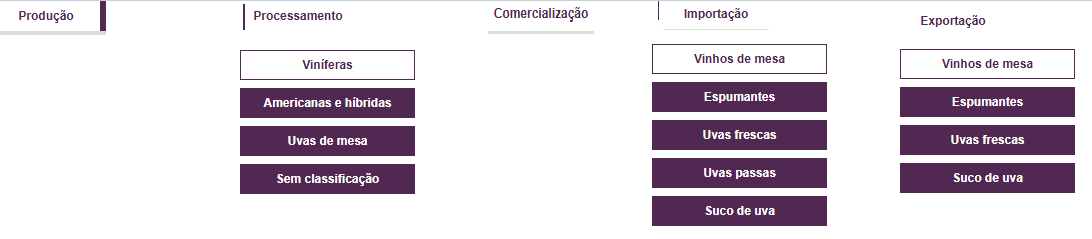

In [117]:
#subsegmento

In [118]:
#Definicao do dicionario - pré-configuração

dc_embrapa = {
    'Produção':{
        'opcao': "",
        'subopcao':[],
        'categorias':[],
        'anos': [y for y in range(1970,2024)],
        'table_index':3
    },
        'Processamento':{
        'opcao': "",
        'subopcao':[],
        'categorias':[],
        'anos': [y for y in range(1970,2024)],
        'table_index':3
    },
        'Comercialização':{
        'opcao': "",
        'subopcao':[],
        'categorias':[],
        'anos': [y for y in range(1970,2024)],
        'table_index':3
    },
        'Importação':{
        'opcao': "",
        'subopcao':[],
        'categorias':[],
        'anos': [y for y in range(1970,2024)],
        'table_index':3
    },
        'Exportação':{
        'opcao': "",
        'subopcao':[],
        'categorias':[],
        'anos': [y for y in range(1970,2024)],
        'table_index':3
    }
}

In [119]:
# Função para acessar a url com limite de tentativa pré definido de 200

def processa_request(url, max_tentativa_acesso = 2000):

  i = 1
  while i < max_tentativa_acesso:

    try:
      data = requests.get(url).text

      print("Acesso OK para url na iteração nº", i)
      i = max_tentativa_acesso + 1
    except:
      #print("Erro listar_subsegmento")
      i += 1
  return data

In [120]:
# Criação do objeto BeautifulSoup da url

def cria_objeto_soup(data):

  # Criacao do objeto BeautifulSoup
  soup = BeautifulSoup(data, 'html.parser')
  return soup

In [121]:
# Retorna a lista de segmentos (tipos de uva): descrição e suburl relacianada

def listar_subgmentos(segmento, url):

      print("\nFuncao listar_subsegmento - url:", url)

      data = processa_request(url)

      # Criacao do objeto BeautifulSoup
      #soup = BeautifulSoup(data, 'html.parser')
      soup = cria_objeto_soup(data)

      # Identificação dos sublinks do segmento
      subopcao_buttons = soup.find_all('button', attrs={'name': 'subopcao'})

      #print("subopcao_buttons", subopcao_buttons)

      # Nome dos sublinks
      subopcao_values = [(button.text.strip()) for button in subopcao_buttons]

      #print("subopcao_values", subopcao_values)

      # Ref dos sublinks
      subopcao_links = [(button['value']) for button in subopcao_buttons]

      #print("subopcao_links", subopcao_links)

      subopcao_buttons_values = [(button.text.strip(), button['value']) for button in subopcao_buttons]


      return subopcao_values, subopcao_links, dict(subopcao_buttons_values)

In [122]:
 # Função que realizada a leitura da tabela da página para o ano correspondente

 def captura_dados(ano):

    print("\nFuncao captura_dados", ano)
    # Criacao do objeto BeautifulSoup
    #soup2 = BeautifulSoup(data2, 'html.parser')
    soup2 = cria_objeto_soup(data2)

    # Verificacao tabelas e respectivas classes
    print('Classes de cada tabela:')
    for table in soup.find_all('table'):
        print(table.get('class'))

    # Criação de lista com todas as tabelas
    tables = soup2.find_all('table')

    #  Filtro para tabela alvo
    table = soup2.find('table', class_='tb_base tb_dados')

    # Localizar todas as tags <th>
    th_tags = table.find_all('th')

    # Extrair o texto de cada tag <th>
    headers = [th.get_text(strip=True) for th in th_tags]

    #print(headers)

    # >>>> REAVALIAR NECESSIDADE <<<<<<
    # Tratamento para deixar nome simples em vez de composto
    headers_simples = []
    for item in headers:
      local = item.find(" ") #Procurar por espaco
      if local == -1:
        nome = item
      else:
        nome = item[:local]

      headers_simples.append(nome)

    #print(headers_simples)

    #Criação de lista final de produto vs items
    lista_full = []

    # Coleta dos todos
    for row in table.tbody.find_all('tr'):
        # Busca de dados para todas as colunas
        columns = row.find_all('td')

        if(columns != []):
          if len(headers_simples) == 2:
            coluna1 = columns[0].text.strip()
            coluna2 = columns[1].text.strip()

            list_items = [coluna1, coluna2]
          else:
            coluna1 = columns[0].text.strip()
            coluna2 = columns[1].text.strip()
            coluna3 = columns[2].text.strip()

            list_items = [coluna1, coluna2, coluna3]

            #Append na lista final de itens

          lista_full.append(list_items)


    print(lista_full)
    print(type(lista_full))

    # Definição do DataFrame
    df = pd.DataFrame(lista_full, columns=[headers])
    df['LinhaNegocio'] = segmento
    #print(subsegmento.text.strip())
    #print("erro aqui descricao", descricao)
    if len(descricao):
      *row, = descricao
      subseg, = row
      df['SubLinhaNegocio'] = subseg
    else:
      df['SubLinhaNegocio'] = None

    df['Ano'] = ano


    #print("--------")
    #print("----df---\n",df)
    return df

**Passo 1a:** Acesso da home page para recuperação das sub-páginas

In [123]:
url = f"http://vitibrasil.cnpuv.embrapa.br/"

In [124]:
data = processa_request(url)

Acesso OK para url na iteração nº 15


In [125]:
# Criacao do objeto BeautifulSoup
soup = cria_objeto_soup(data)

In [126]:
# Lista dos botões opções da página
opcao_buttons = soup.find_all('button', attrs={'name': 'opcao'})

In [127]:
opcao_buttons

[<button class="btn_opt" name="opcao" type="submit" value="opt_01">Apresentação</button>,
 <button class="btn_opt" name="opcao" type="submit" value="opt_02">Produção</button>,
 <button class="btn_opt" name="opcao" type="submit" value="opt_03">Processamento</button>,
 <button class="btn_opt" name="opcao" type="submit" value="opt_04">Comercialização</button>,
 <button class="btn_opt" name="opcao" type="submit" value="opt_05">Importação</button>,
 <button class="btn_opt" name="opcao" type="submit" value="opt_06">Exportação</button>,
 <button class="btn_opt" name="opcao" type="submit" value="opt_07">Publicação</button>]

In [128]:
# Dicionario das sub-páginas e respectivos links
opcao_buttons_values = [(button.text.strip(), button['value']) for button in opcao_buttons]

In [129]:
opcao_buttons_values

[('Apresentação', 'opt_01'),
 ('Produção', 'opt_02'),
 ('Processamento', 'opt_03'),
 ('Comercialização', 'opt_04'),
 ('Importação', 'opt_05'),
 ('Exportação', 'opt_06'),
 ('Publicação', 'opt_07')]

In [130]:
# Dicionario das sub-páginas e respectivos links
result_dict_paginas = dict(opcao_buttons_values)

In [131]:
result_dict_paginas

{'Apresentação': 'opt_01',
 'Produção': 'opt_02',
 'Processamento': 'opt_03',
 'Comercialização': 'opt_04',
 'Importação': 'opt_05',
 'Exportação': 'opt_06',
 'Publicação': 'opt_07'}

**Passo 1b:** Atualização do dicionario com as referencias dos segmentos disponiveis na url da homepage


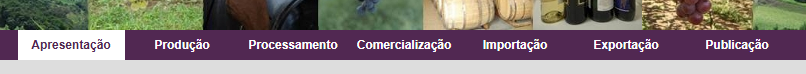



Objetivo: Atualizar no dicionario o campo Opcao para cada segmento disponivel.

Atenção: Os segmentos Apresentação e Publicação não existem no dicionário porque não tem informações do "Banco de dados de uva, vinho e derivados"

In [132]:
for chave, valor in result_dict_paginas.items():
  try:
    dc_embrapa[chave]['opcao'] = valor
    #print(valor)
  except KeyError:
    print(f"A chave '{chave}' não existe no dicionário.")
  #print(chave, valor)

A chave 'Apresentação' não existe no dicionário.
A chave 'Publicação' não existe no dicionário.


**Passo 2:** Processamento inicial  página que deseja recuperar os dados (campo segmento informado anteriormente)

In [133]:
try:
  opcao= dc_embrapa[segmento]['opcao']
  print("Segmento selecionado:", opcao)
except KeyError:
  print(f"A chave '{segmento}' não existe no dicionário.")

Segmento selecionado: opt_06


In [134]:
# Lista para identificar se pesquisa é para apenas um segmento ou todos

if segmento != []:
  lista_segmentos = [segmento]
else:
  lista_segmentos = dc_embrapa.keys()

print("Lista de segmentos para processamento:", lista_segmentos)


Lista de segmentos para processamento: ['Exportação']


Obs: Embora implantado essa validação, a lógica de obrigar a necessidade de informar apenas 1 segmento de consulta foi mantido no inicio do notebook.

In [135]:
try:
  print(f"Para o segmento {segmento} o sublink associado é {dc_embrapa[segmento]['opcao']}")
except KeyError:
  print(f"A chave '{segmento}' não existe no dicionário.")
  #força interrupção para notebook não avançar na próxima celula
  sys.exit(1)

Para o segmento Exportação o sublink associado é opt_06


**Passo 3:** Atualizar dinamicamente categorias e subopcao

In [136]:
url = f"http://vitibrasil.cnpuv.embrapa.br/index.php?opcao={dc_embrapa[segmento]['opcao']}"

In [137]:
# Chamada da função Listar_segmentos

lista_categorias, lista_links_categorias, result_dict_subpag  = listar_subgmentos(segmento, url)


Funcao listar_subsegmento - url: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_06
Acesso OK para url na iteração nº 37


In [138]:
result_dict_subpag

{'Vinhos de mesa': 'subopt_01',
 'Espumantes': 'subopt_02',
 'Uvas frescas': 'subopt_03',
 'Suco de uva': 'subopt_04'}

In [139]:
lista_categorias

['Vinhos de mesa', 'Espumantes', 'Uvas frescas', 'Suco de uva']

In [140]:
lista_links_categorias

['subopt_01', 'subopt_02', 'subopt_03', 'subopt_04']

In [141]:
segmento


'Exportação'

In [142]:
# Antes atualização do dicionario
print(dc_embrapa[segmento]['categorias'])
print(dc_embrapa[segmento]['subopcao'])

[]
[]


In [143]:
for nome_segmento in lista_segmentos:

  dc_embrapa[nome_segmento]['categorias'] = lista_categorias
  dc_embrapa[nome_segmento]['subopcao'] = lista_links_categorias

In [144]:
# Após atualização do dicionário
print(dc_embrapa[segmento]['categorias'])
print(dc_embrapa[segmento]['subopcao'])

['Vinhos de mesa', 'Espumantes', 'Uvas frescas', 'Suco de uva']
['subopt_01', 'subopt_02', 'subopt_03', 'subopt_04']


**Passo 4:** Consiste o subsegmento quando informado

In [145]:
print(subsegmento)

*


In [146]:
subsegmento


'*'

In [147]:
#aqui

In [148]:
if not dc_embrapa[segmento]['categorias'] == []:
  try:
    dc_embrapa[segmento]['categorias'].index(subsegmento[0])
  except:
    if subsegmento != '*' :
      print(subsegmento, "é um valor inválido para as opcoes disponiveis em", segmento)
      #força interrupção para notebook não avançar na próxima celula
      sys.exit(1)

In [149]:
# Se subsegmento não for informado e segmento tem subsegmento, retornar toda a lista de subsegmentos para pesquisa
if not subsegmento == dc_embrapa[segmento]['subopcao']:
  if subsegmento == '*':
    subsegmento = lista_categorias

In [150]:
print(subsegmento)

['Vinhos de mesa', 'Espumantes', 'Uvas frescas', 'Suco de uva']


In [151]:
'''try:
  index_categ = dc_embrapa[segmento]['categorias'].index(subsegmento[0])
  dc_embrapa[segmento]['subopcao'][index_categ]
  print(dc_embrapa[segmento]['subopcao'][index_categ])
except:
  print("Erro!!!!")'''

'try:\n  index_categ = dc_embrapa[segmento][\'categorias\'].index(subsegmento[0])\n  dc_embrapa[segmento][\'subopcao\'][index_categ]\n  print(dc_embrapa[segmento][\'subopcao\'][index_categ])\nexcept:\n  print("Erro!!!!")'

**Passo 5 :** Ler tabela da página

In [152]:
#Criação do Dataframe que irá acumular todas as ocorrências das tabelas para cada ano de pesquisa
df_final = pd.DataFrame()

In [153]:
#from re import sub
# Loop por segmentos e anos

lista_anos = []

for nome_segmento in lista_segmentos:
  print(nome_segmento) #<---- mudar nome

  #dc_embrapa[nome_segmento]['categorias'] = lista_categorias
  #dc_embrapa[nome_segmento]['subopcao'] = lista_links_categorias

  #validação
  print("subopcao:", dc_embrapa[segmento]['subopcao'])
  print("categorias:", dc_embrapa[segmento]['categorias'])
  #print("categorias:", dc_embrapa[segmento]['categorias'].index(nome_segmento))
  print("subgmento-informado:", subsegmento)

  if ano != None:
    if ano in dc_embrapa[nome_segmento]['anos']: #ano informado existe na lista de anos do dicionrio?
      #print("Ano informado existe na lista")
      lista_anos = [ano]
    else:
      print("Ano informado NÃO existe na lista")
  else:
    print("Será processado todos os anos disponiveis no dicionario para o segmento", segmento)
    lista_anos = dc_embrapa[nome_segmento]['anos']
  print("Lista de anos", lista_anos)

  #result_dict_subpag  = listar_subgmentos(segmento)
  #print("subsegmentos", result_dict_subpag)

  if subsegmento == None and len(result_dict_subpag ) == 0:
    print("Não há subsegmentos para o segmento", segmento)

  for year in lista_anos:

        #print("ver parada", result_dict_subpag)
        #print("len", len(result_dict_subpag ))
        if len(result_dict_subpag ) == 0:

          #print("entrei aqui1")
          url2 = f"http://vitibrasil.cnpuv.embrapa.br/index.php?ano={year}&opcao={opcao}"
          descricao = None
          print("url2 com ano fixo", url2)
          data2 = processa_request(url2)
          print("qual valor do subsegmento", subsegmento)
          if subsegmento == []:
             subsegmento = ['None']
             for descricao in subsegmento:
                print("xxxx", descricao)
                lista_temp = []
                lista_temp.append(descricao)
                descricao = lista_temp
                df_temp = captura_dados(year)
                #df_final = pd.concat([df_final, zz])
                #estrategia para evitar abend no erro aqui
                #descricao = lista_temp
                #print("teste", teste)
                #df_final.append(zz)
                df_final = pd.concat([df_final, df_temp])
                subsegmento = [] #sem essa jogada, se perde no for acima

        else:
          #print("entrei aqui2")
          for descricao in subsegmento:
            #print("entrei aqui3")
            #print("xxxx", descricao)
            indice_categoria = dc_embrapa[segmento]['categorias'].index(descricao)
            indice = dc_embrapa[segmento]['subopcao'][indice_categoria]
            #print("indice", indice)
            url2 = f"http://vitibrasil.cnpuv.embrapa.br/index.php?ano={year}&opcao={opcao}&subopcao={indice}"
            print("Url Ano ", ano, url2)
            data2 = processa_request(url2)
            #df_temp = captura_dados
            lista_temp = []
            lista_temp.append(descricao)
            #estrategia para evitar abend no erro aqui
            descricao = lista_temp
            df_temp = captura_dados(year)
            #print("zz", zz)
            #print("teste", teste)
            df_final = pd.concat([df_final, df_temp])
            #df_final.append(zz)


Exportação
subopcao: ['subopt_01', 'subopt_02', 'subopt_03', 'subopt_04']
categorias: ['Vinhos de mesa', 'Espumantes', 'Uvas frescas', 'Suco de uva']
subgmento-informado: ['Vinhos de mesa', 'Espumantes', 'Uvas frescas', 'Suco de uva']
Lista de anos [2023]
Url Ano  2023 http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2023&opcao=opt_06&subopcao=subopt_01
Acesso OK para url na iteração nº 1

Funcao captura_dados 2023
Classes de cada tabela:
['tb_layout']
['tb_base']
['tb_layout']
['tb_layout', 'no_print']
['tb_base']
['tb_base', 'tb_link', 'no_print']
['tb_base']
['tb_base', 'tb_footer']
[['Afeganistão', '-', '-'], ['África do Sul', '117', '698'], ['Alemanha, República Democrática', '4.806', '31.853'], ['Angola', '-', '-'], ['Anguilla', '-', '-'], ['Antígua e Barbuda', '383', '1.848'], ['Antilhas Holandesas', '-', '-'], ['Arábia Saudita', '124', '142'], ['Argentina', '4.545', '36.133'], ['Aruba', '-', '-'], ['Austrália', '2.485', '13.565'], ['Áustria', '-', '-'], ['Bahamas', '1.348', '7.

In [154]:
df_final

,Países,Quantidade (Kg),Valor (US$),LinhaNegocio,SubLinhaNegocio,Ano
0,Afeganistão,-,-,Exportação,Vinhos de mesa,2023
1,África do Sul,117,698,Exportação,Vinhos de mesa,2023
2,"Alemanha, República Democrática",4.806,31.853,Exportação,Vinhos de mesa,2023
3,Angola,-,-,Exportação,Vinhos de mesa,2023
4,Anguilla,-,-,Exportação,Vinhos de mesa,2023
...,...,...,...,...,...,...
117,Trinidade e Tobago,-,-,Exportação,Suco de uva,2023
118,Turquia,230,455,Exportação,Suco de uva,2023
119,Uruguai,-,-,Exportação,Suco de uva,2023
120,Vanuatu,-,-,Exportação,Suco de uva,2023
